In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs=4

In [4]:
path = '/home/spriyanshu723/biomedical/Mask_with_2class/'

In [5]:
data = (ImageList.from_folder(path).split_by_rand_pct().label_from_folder().databunch(bs=bs))
data

ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Benign,Benign,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Valid: LabelList (1304 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Malignant,Benign,Benign,Malignant,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Test: None

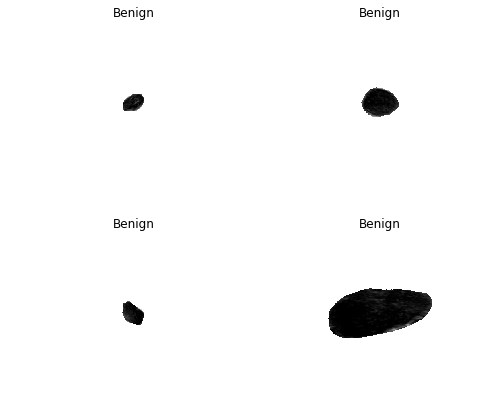

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
data.classes

['Benign', 'Malignant']

## TRAINING 

In [8]:
learn = cnn_learner(data, models.resnet101, metrics=error_rate)

In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


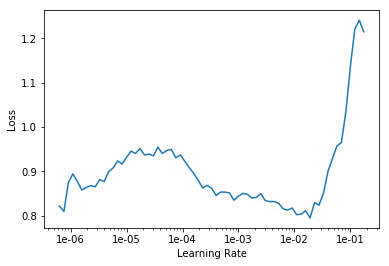

In [13]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(1, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.526980,41.036789,0.211656,02:49


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


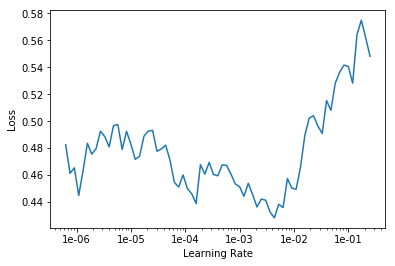

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(2, max_lr=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.551483,3.599082,0.195552,02:48
1,0.496156,9.078322,0.191718,02:49


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


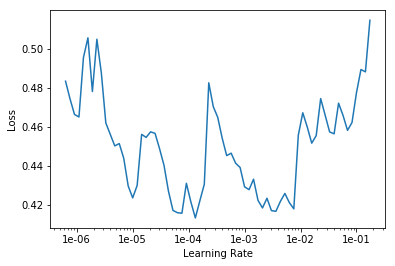

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.save('class_res101_1')

In [24]:
learn.load('class_res101_1')
learn.fit_one_cycle(2, max_lr=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.526577,42.951500,0.198620,02:49
1,0.396136,28.692057,0.151840,02:49


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


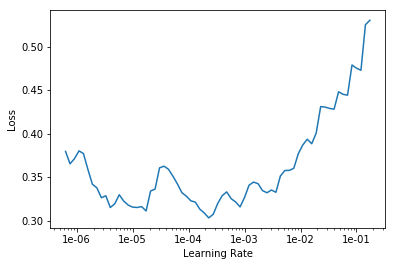

In [25]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.load('class_res101_3')

Learner(data=ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Benign,Benign,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Valid: LabelList (1304 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Benign,Benign,Malignant
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


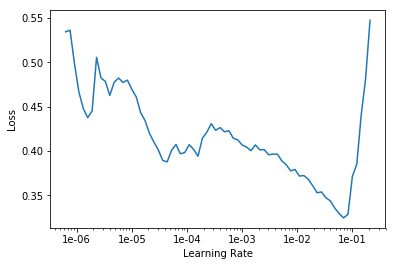

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(4, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.406445,2.609151,0.127301,02:49
1,0.358542,18.255920,0.128067,02:49
2,0.407593,5.351560,0.127301,02:49
3,0.413003,5.485814,0.140337,02:49


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


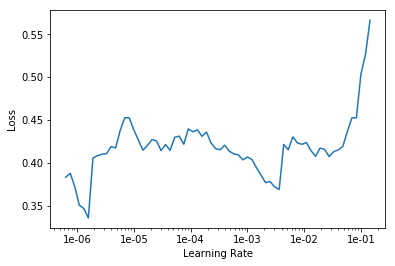

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.save('class_res101_4')

In [17]:
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.398288,4.506079,0.125000,02:49
1,0.402553,15.078005,0.131135,02:49


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


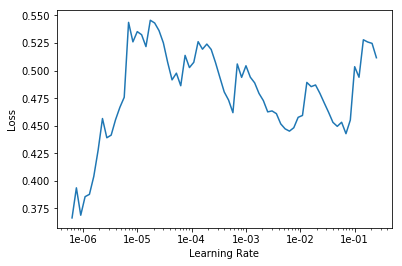

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.save('class_res101_5')

In [21]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


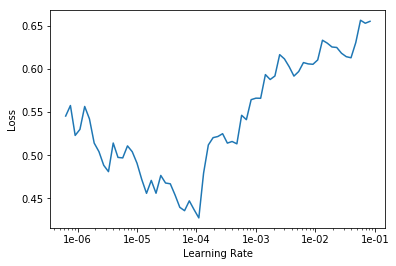

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(2, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.548738,6.412626,0.283742,03:58
1,0.487155,3.422296,0.161810,03:57


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


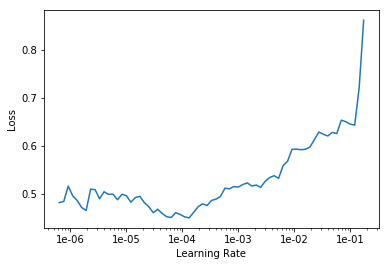

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.save('class_res101_6')

In [26]:
learn.fit_one_cycle(2, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.511056,3.100750,0.254601,03:58
1,0.483968,36.125652,0.185583,03:58


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


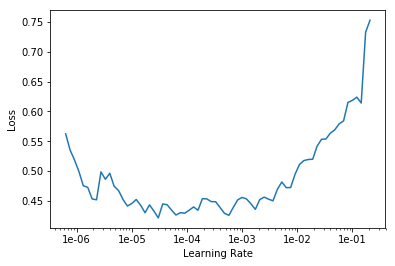

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.save('class_res101_7')

In [29]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.450935,3.928405,0.144939,03:58
1,0.430866,1.558118,0.131902,03:58


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


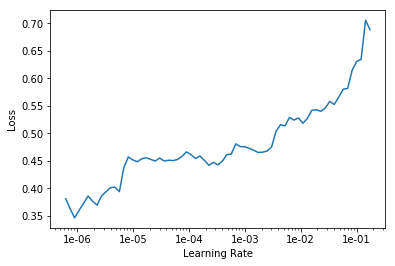

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.save('class_res101_8')

In [33]:
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.391451,13.378969,0.133436,03:58
1,0.408302,3.481853,0.121933,03:58


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


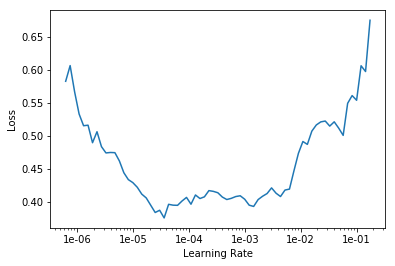

In [34]:
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.save('class_res101_9')

In [41]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.422788,1.019515,0.132669,03:58
1,0.407333,0.450751,0.122699,03:58


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


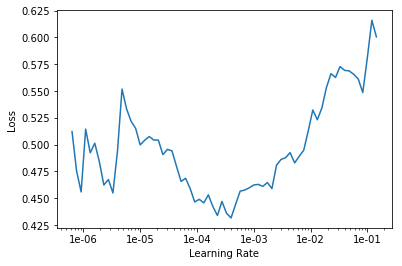

In [42]:
learn.lr_find()
learn.recorder.plot()

In [43]:
learn.save('class_res101_10')

In [52]:
learn.fit_one_cycle(4, max_lr=(1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.431477,1.092876,0.163344,03:58
1,0.399467,3.063254,0.163344,03:58
2,0.383832,0.356139,0.123466,03:58
3,0.394734,0.352134,0.131135,03:58


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


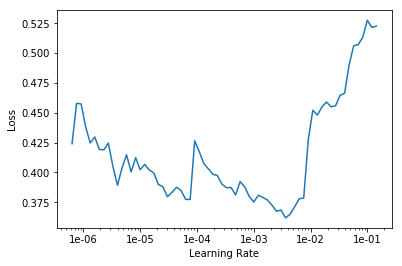

In [53]:
learn.lr_find()
learn.recorder.plot()

In [54]:
learn.save('class_res101_11')

In [24]:
learn.load('class_res101_11')

Learner(data=ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Benign,Benign,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Valid: LabelList (1304 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Benign,Benign,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): B

In [25]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.417663,16.877083,0.177147,03:57
1,0.390286,1.798620,0.142638,03:57


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


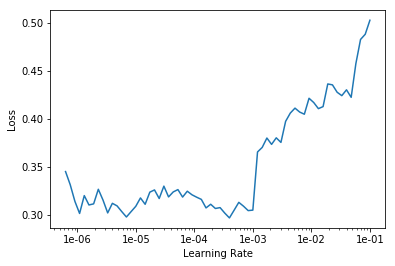

In [26]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.save('class_res101_12')

In [10]:
learn.load('class_res101_8')

Learner(data=ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Benign,Benign,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Valid: LabelList (1304 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Malignant,Benign,Benign,Malignant,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (b

In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


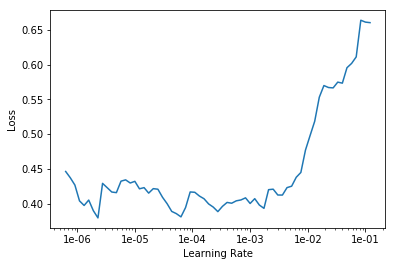

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.425644,8.878772,0.171779,03:59
1,0.386854,5.901172,0.141104,03:58


## Result 

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

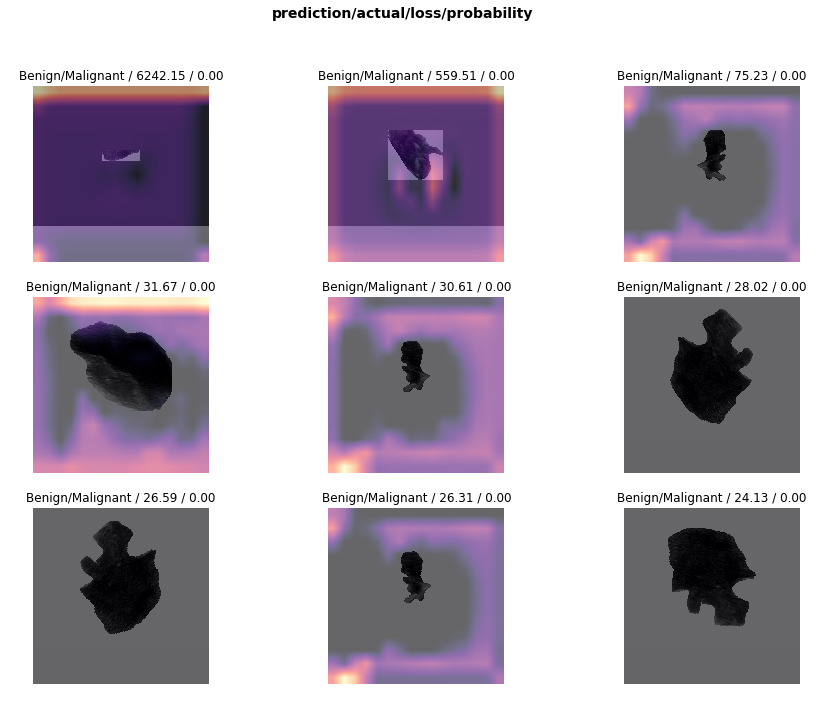

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

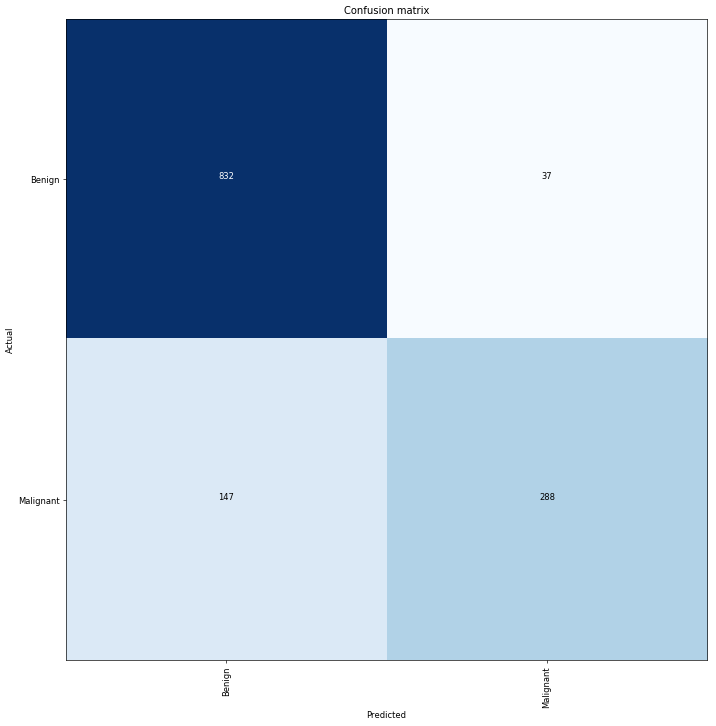

In [16]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)